In [1]:
import numpy as np
import matplotlib.pyplot as plt
time_X_pulse_start = 460

In [2]:
def flip_around_average(arr):
    avg_value = np.mean(arr)
    flipped_arr = avg_value - (arr - avg_value)
    return flipped_arr

from fit_cosine_curve import *

Text(0.5, 1.0, 'Rabi with X pulse on qubit 7 at t = 460 ns')

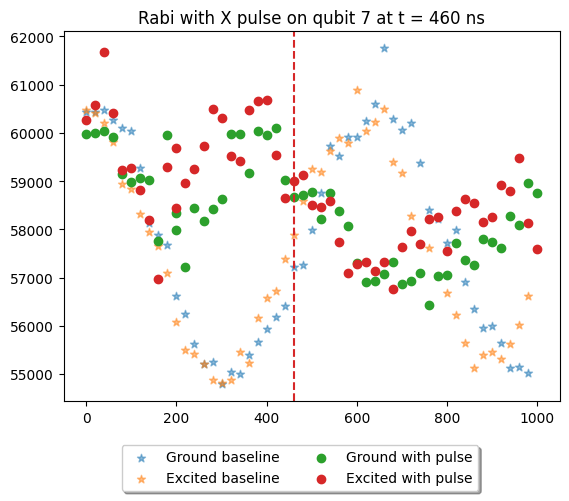

In [3]:
rabi_gnd_results = np.load('rabi_gnd_results.npy')
rabi_exc_results = np.load('rabi_exc_results.npy' )
rabi_pulse_length = np.load('rabi_pulse_length.npy')
single_X_gnd_results = np.load(f'single_X_at_{time_X_pulse_start}_gnd_results.npy')
single_X_exc_results = np.load(f'single_X_at_{time_X_pulse_start}_exc_results.npy')
single_total_length = np.load(f'single_X_at_{time_X_pulse_start}_total_length.npy')


rabi_gnd_results_fitted, params = fit_cosine_curve(rabi_pulse_length,rabi_gnd_results)
rabi_exc_results_fitted, params = fit_cosine_curve(rabi_pulse_length,rabi_exc_results)
single_X_gnd_results_fitted, params_green = fit_cosine_curve(single_total_length[single_total_length>time_X_pulse_start+45],single_X_gnd_results[single_total_length>time_X_pulse_start+45])
single_X_exc_results_fitted, params = fit_cosine_curve(single_total_length[single_total_length>time_X_pulse_start+45],single_X_exc_results[single_total_length>time_X_pulse_start+45])

# Plotting results
plt.scatter(rabi_pulse_length, rabi_gnd_results, color="C0",label = 'Ground baseline', marker='*',alpha = 0.5)
plt.scatter(rabi_pulse_length, rabi_exc_results, color="C1",label = 'Excited baseline', marker='*',alpha = 0.5)
plt.scatter(single_total_length[single_X_gnd_results>10], single_X_gnd_results[single_X_gnd_results>10], color="C2", label = 'Ground with pulse')
plt.scatter(single_total_length[single_X_exc_results>10], single_X_exc_results[single_X_exc_results>10], color="C3", label = 'Excited with pulse')


plt.plot(rabi_pulse_length,rabi_gnd_results_fitted, color="C0",alpha = 0.5)
plt.plot(rabi_pulse_length,rabi_exc_results_fitted, color="C1",alpha = 0.5)
plt.plot(single_total_length[single_total_length>time_X_pulse_start+45],single_X_gnd_results_fitted, color="C2",alpha = 0.5)
plt.plot(single_total_length[single_total_length>time_X_pulse_start+45],single_X_exc_results_fitted, color="C3",alpha = 0.5)

plt.axvspan(time_X_pulse_start, time_X_pulse_start+45*0.9/2, alpha = 0.3, color = 'C3')
plt.legend(bbox_to_anchor=(0.85, -0.1),shadow=True, ncol=2)
plt.savefig('rabi_exc_time_X_pulse_start.png')  # Saving plot as image file
plt.title(f"Rabi with X pulse on qubit 7 at t = {time_X_pulse_start} ns")